# Data

## WeatherBench

We are using the [WeatherBench dataset](https://github.com/pangeo-data/WeatherBench). The WeatherBench Dataset consists of preprocessed meteorological data from [ERA5](https://www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/era5). ERA5 provides hourly estimates of a large number of atmospheric, land and oceanic climate variables. The data cover the Earth on a 30km grid and resolve the atmosphere using 137 levels from the surface up to a height of 80km. WeatherBench processes this dataset to provide wind direction, wind speed, temperature, geopotential, vorticity, humidity, solar radiation, cloud cover, and precipitation data at various levels, with hourly readings going back to 1979. The data is given at multiple spatial resolutions, specifically 1.40625 deg, 2.8125 deg, and 5.625 deg. The total size of all provided data is 5.8 TB, but we download only the specific data that we need.

In [1]:
# !pip install climetlab
# !pip install climetlab_weatherbench
# !pip install numexpr=='2.7.3'
import xarray as xr
import climetlab as cml

## Loading The Data

We can directly download zip files consisting of the data we are interested in from [here](https://dataserv.ub.tum.de/index.php/s/m1524895?path=%2F). The corresponding zip file consists of yearly [NetCDF](https://en.wikipedia.org/wiki/NetCDF) files, which can be combined to be represented as a `xarray.Dataset`.

In [16]:
# Downloads 2m temperature data at 5.625 degree resolution
!wget --no-check-certificate "https://dataserv.ub.tum.de/s/m1524895/download?path=%2F5.625deg%2F2m_temperature&files=2m_temperature_5.625deg.zip" -O '2m_temperature_5.625deg.zip'

--2022-11-27 18:35:57--  https://dataserv.ub.tum.de/s/m1524895/download?path=%2F5.625deg%2F2m_temperature&files=2m_temperature_5.625deg.zip
Resolving dataserv.ub.tum.de (dataserv.ub.tum.de)... 2001:4ca0:800::8af6:e022, 138.246.224.34
Connecting to dataserv.ub.tum.de (dataserv.ub.tum.de)|2001:4ca0:800::8af6:e022|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... ^C


In [10]:
!mkdir -p '2m_temperature'
!unzip -d '2m_temperature/' '2m_temperature_5.625deg.zip'
!rm '2m_temperature_5.625deg.zip'

Archive:  2m_temperature_5.625deg.zip
  inflating: 2m_temperature/2m_temperature_1979_5.625deg.nc  
  inflating: 2m_temperature/2m_temperature_1980_5.625deg.nc  
  inflating: 2m_temperature/2m_temperature_1981_5.625deg.nc  
  inflating: 2m_temperature/2m_temperature_1982_5.625deg.nc  
  inflating: 2m_temperature/2m_temperature_1983_5.625deg.nc  
  inflating: 2m_temperature/2m_temperature_1984_5.625deg.nc  
  inflating: 2m_temperature/2m_temperature_1985_5.625deg.nc  
  inflating: 2m_temperature/2m_temperature_1986_5.625deg.nc  
  inflating: 2m_temperature/2m_temperature_1987_5.625deg.nc  
  inflating: 2m_temperature/2m_temperature_1988_5.625deg.nc  
  inflating: 2m_temperature/2m_temperature_1989_5.625deg.nc  
  inflating: 2m_temperature/2m_temperature_1990_5.625deg.nc  
  inflating: 2m_temperature/2m_temperature_1991_5.625deg.nc  
  inflating: 2m_temperature/2m_temperature_1992_5.625deg.nc  
  inflating: 2m_temperature/2m_temperature_1993_5.625deg.nc  
  inflating: 2m_temperature/2m_t

In [9]:
# Loads data as xarray.Dataset
temp_data = xr.open_mfdataset('2m_temperature/*.nc', combine='by_coords')
temp_data

<xarray.Dataset>
Dimensions:  (lon: 64, lat: 32, time: 350640)
Coordinates:
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
Data variables:
    t2m      (time, lat, lon) float32 dask.array<chunksize=(8760, 32, 64), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-07 07:51:20 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

## CliMetLab

Instead of downloading data through the zip files, we will use the CliMetLab package. CliMetLab is a Python package aiming at simplifying access to climate and meteorological datasets, allowing users to focus on science instead of technical issues such as data access and data formats. It is mostly intended to be used in Jupyter notebooks, and be interoperable with all popular data analytic packages, such as NumPy, Pandas, Xarray, SciPy, Matplotlib, etc. as well as machine learning frameworks, such as TensorFlow, Keras or PyTorch.

In [18]:
rain_data = cml.load_dataset("weather-bench", parameter="total_precipitation", resolution=5.625).to_xarray()
rain_data

/home/ananda/miniconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dataserv.ub.tum.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


<xarray.Dataset>
Dimensions:  (lat: 32, lon: 64, time: 350633)
Coordinates:
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * time     (time) datetime64[ns] 1979-01-01T07:00:00 ... 2018-12-31T23:00:00
Data variables:
    tp       (time, lat, lon) float32 dask.array<chunksize=(8753, 32, 64), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2020-01-01 16:44:41 GMT by grib_to_netcdf-2.15.0: /opt/ecmw...

### Plotting

CliMetLab also allows for easy plotting and visualization features that allow us to visualize various kinds of meteorological data. 

In [2]:
temp_data = xr.open_mfdataset('../data/2m_temperature.nc')
rain_data = xr.open_mfdataset('../data/total_precipitation.nc')

In [13]:
plot = lambda x : cml.plot_map(
    data=x,
    foreground=dict(
        map_grid=False,
        map_boundaries=True,
    ),
    style=dict(
        contour = False,
        contour_hilo = False,
        contour_interval = 4.5,
        contour_label = False,
        contour_level_selection_type = 'interval',
        contour_shade = True,
        contour_shade_palette_name = 'eccharts_rainbow_purple_red_25',
        contour_shade_colour_method = 'palette',
        contour_shade_method = 'area_fill',
    ),
)

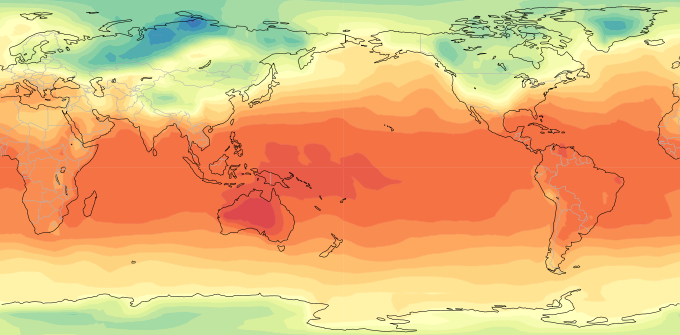

In [14]:
plot(temp_data.t2m[0])

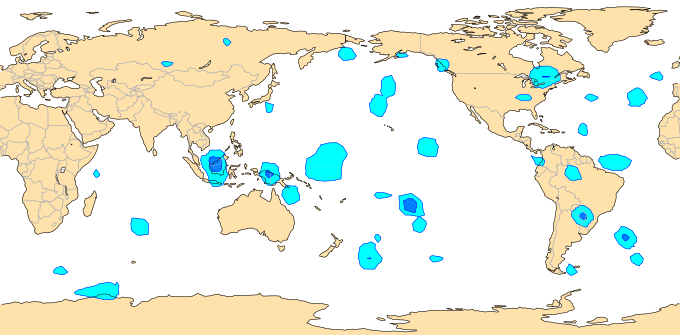

In [5]:
cml.plot_map(
    rain_data.tp[0],
    foreground=dict(
        map_grid=False,
        map_boundaries=True,
    ),
)

We are only predicting weather for the United States, so we can ignore the data outside the bounding box for the United States

In [6]:
lat_bounds = [bool((x < 55) and (x > 18)) for x in temp_data.lat]
lon_bounds = [bool((x < 300) and (x > 230)) for x in temp_data.lon]

temp_data = temp_data.t2m[:, lat_bounds, lon_bounds]
rain_data = rain_data.tp[:, lat_bounds, lon_bounds]

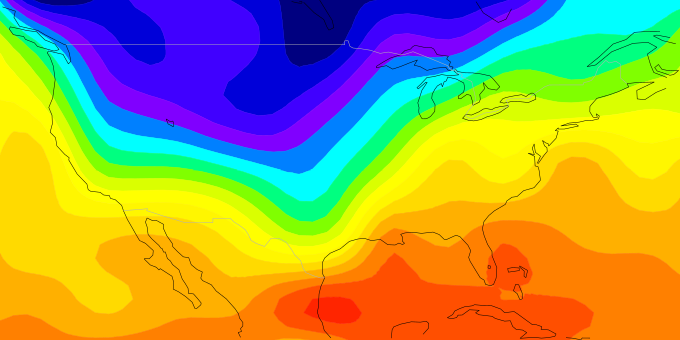

In [8]:
cml.plot_map(
    temp_data[0],
    foreground=dict(
        map_grid=False,
        map_boundaries=True,
    ),
)

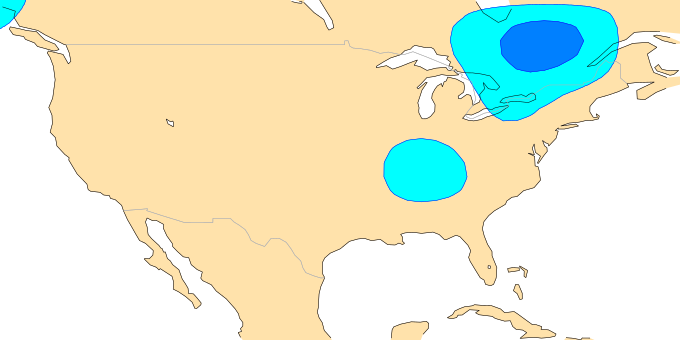

In [9]:
cml.plot_map(
    rain_data[0],
    foreground=dict(
        map_grid=False,
        map_boundaries=True,
    ),
)

## Saving Data

To process the data, we will narrow down the columns in the data to be only the ones we need, specifically `2m_temperature` and `total_precipitation`. If our data has layers, then we will be only using the layer closest to the earth. We will also be calculating running window averages for longer term climatology forecasting using the [`rolling`](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.rolling.html) function for `xarray`. 

In [10]:
# !mkdir 'data'
temp_data.to_netcdf("../data/us_temperature.nc")
rain_data.to_netcdf("../data/us_precipitation.nc")

## Loading Data

We could load data from NetCDF files easily

In [4]:
us_temp_data = xr.open_mfdataset('../data/us_temperature.nc')
us_rain_data = xr.open_mfdataset('../data/us_precipitation.nc')

# Data Augmentation

One of our innovations is that we will also augment the data with rotations of the original data set and with running window averages for longer term climatology forecasting. 

In [13]:
# Running averages
n_avg = lambda x, t: x.rolling(time=t).mean().thin(time=t)

daily_averages = lambda x : n_avg(x, 24)
weekly_averages = lambda x : n_avg(x, 24*7)
monthly_averages = lambda x : n_avg(x, 24*30)
yearly_averages = lambda x : n_avg(x, 24*365)
total_averages = lambda x : n_avg(x, len(temp_data.time))

In [4]:
# Augment Data with Rotations
# If we wanted, we could add random rotations to the dataset, but not necessary at this point.

### Future Work

Note that we are using a relatively small subset of the provided data. However, as more computational complexity needed to process larger datasets, using all features and all levels may result in more accurate predictions, particularly as accurate prediction of temperature and precipitation depends on the other variables provided. 